In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df=df[df["Review text"].notnull()]

In [4]:
df=df[['Review text','Ratings']]

In [5]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [6]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [7]:
lemmatizer = WordNetLemmatizer()

In [8]:
def preprocess(raw_text):
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    sentence = sentence.lower()
    tokens = sentence.split()
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [9]:
from tqdm import tqdm, tqdm_notebook

In [10]:
tqdm.pandas()

In [11]:

df_cleaned= df['Review text'].progress_apply(lambda x: preprocess(x))

df_cleaned.head()

100%|██████████| 8510/8510 [00:09<00:00, 931.10it/s] 


0   1
0  nice product good quality price rising bad sig...  20
1  supplied yonex mavis outside cover yonex ad in...  12
2  worst product damaged shuttlecock packed new b...  17
3  quite k nowadays quality cork like year back u...  30
4  pricedjust retailer understand wat advantage b...   9

In [12]:
merged_df=pd.concat([df_cleaned,df],axis=1)

In [13]:
merged_df.drop(columns=[1,"Review text"],inplace=True)

In [14]:
merged_df

0  Ratings
0     nice product good quality price rising bad sig...        4
1     supplied yonex mavis outside cover yonex ad in...        1
2     worst product damaged shuttlecock packed new b...        1
3     quite k nowadays quality cork like year back u...        3
4     pricedjust retailer understand wat advantage b...        1
...                                                 ...      ...
8505               delivered time price high marketread        3
8506                mark available market le price read        4
8507                            nice delivery speedread        5
8508  complaint item best one way priced easily avai...        5
8509  sure charged product mrp okay pay r product co...        1

[8510 rows x 2 columns]

In [15]:
merged_df.rename(columns={0: 'Review'}, inplace=True)

In [16]:
words_to_remove = ['product', 'quality','shuttle', 'read','flipkart','buy','cork','more']
for word in words_to_remove:
    merged_df['Review'] = merged_df['Review'].str.replace(word, '')

In [17]:
merged_df

Review  Ratings
0     nice  good  price rising bad sign affordable p...        4
1     supplied yonex mavis outside cover yonex ad in...        1
2     worst  damaged cock packed new box original yo...        1
3     quite k nowadays   like year back using mavis ...        3
4     pricedjust retailer understand wat advantage i...        1
...                                                 ...      ...
8505                   delivered time price high market        3
8506                    mark available market le price         4
8507                                nice delivery speed        5
8508  complaint item best one way priced easily avai...        5
8509  sure charged  mrp okay pay r  compared mrp rd ...        1

[8510 rows x 2 columns]

In [18]:
###Final review
from wordcloud import WordCloud

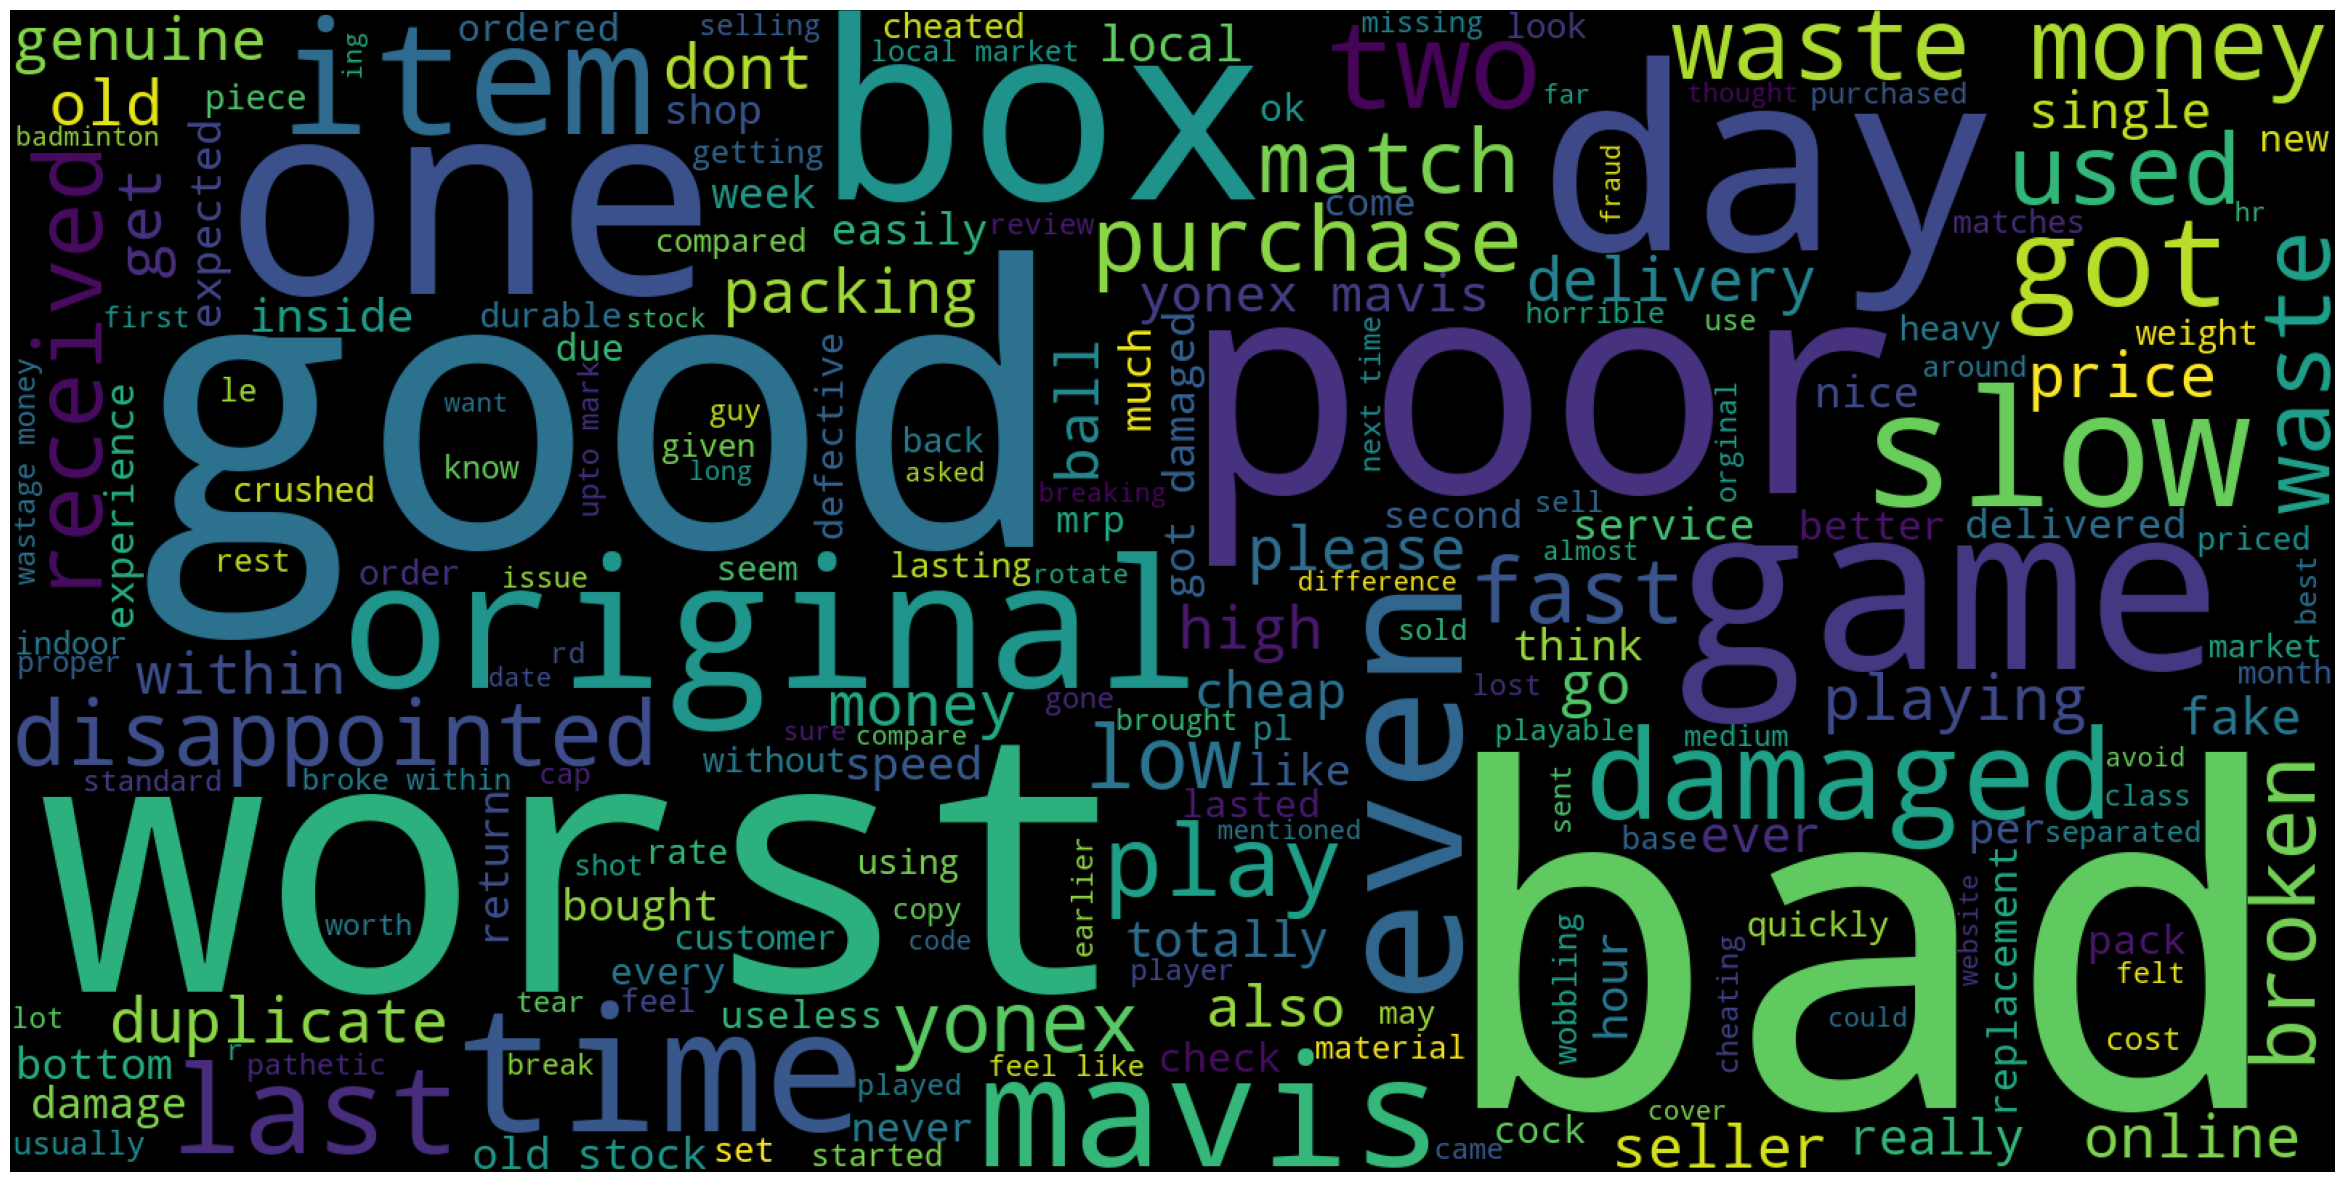

In [19]:
df5=merged_df[merged_df['Ratings']==1]
words_1 = ' '.join(df5['Review'])
wordcloud_1 = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words_1)
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud_1)
plt.axis('off')
plt.show()

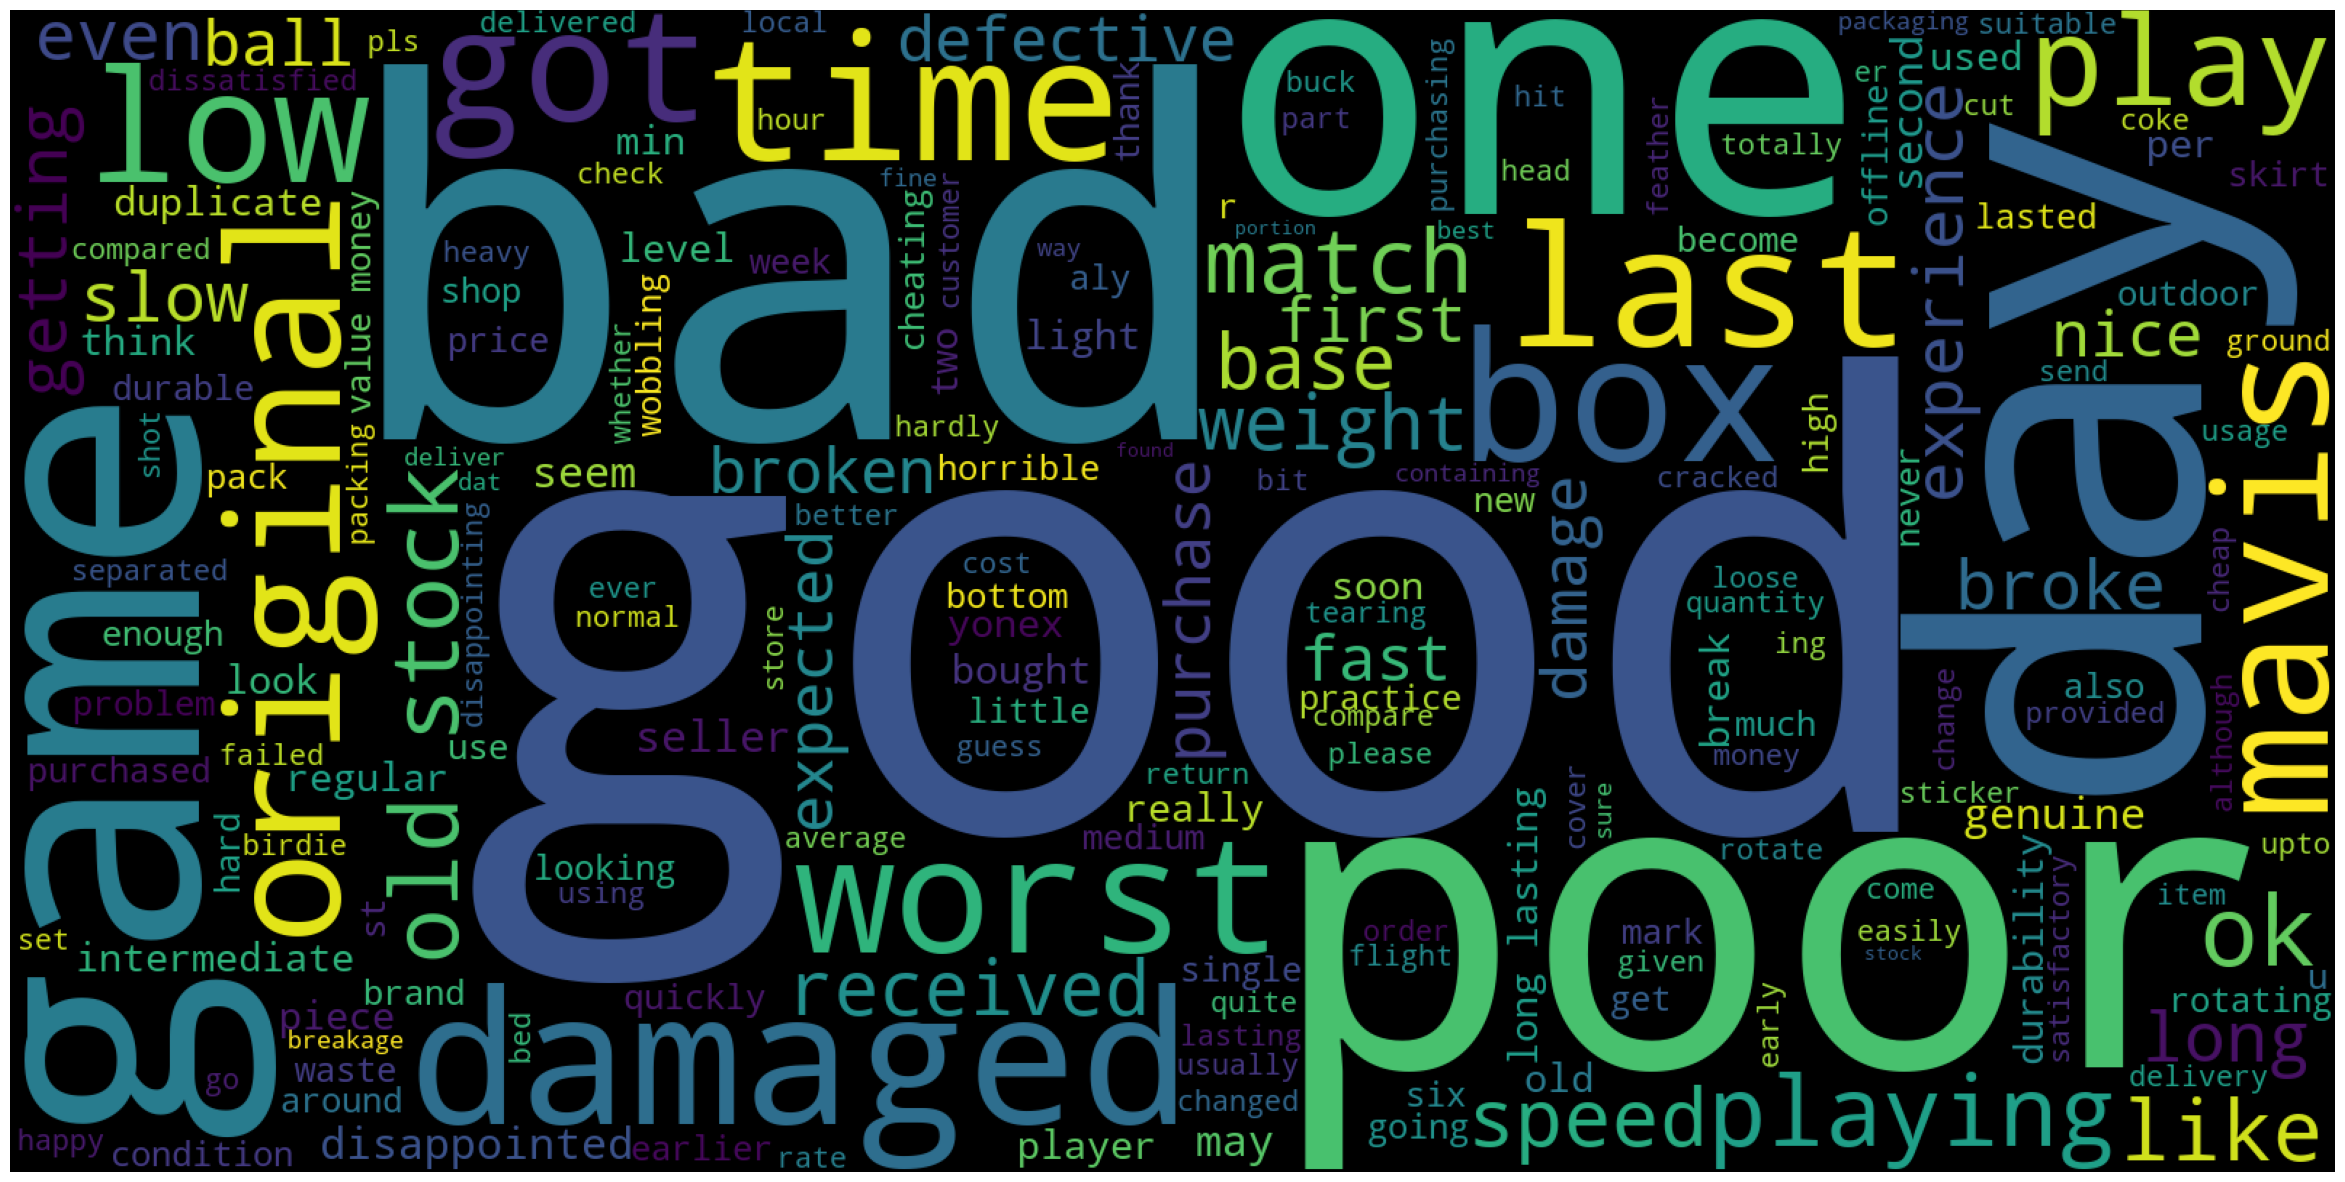

In [20]:
df4=merged_df[merged_df['Ratings']==2]
words_2 = ' '.join(df4['Review'])
wordcloud_2 = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words_2)
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud_2)
plt.axis('off')
plt.show()

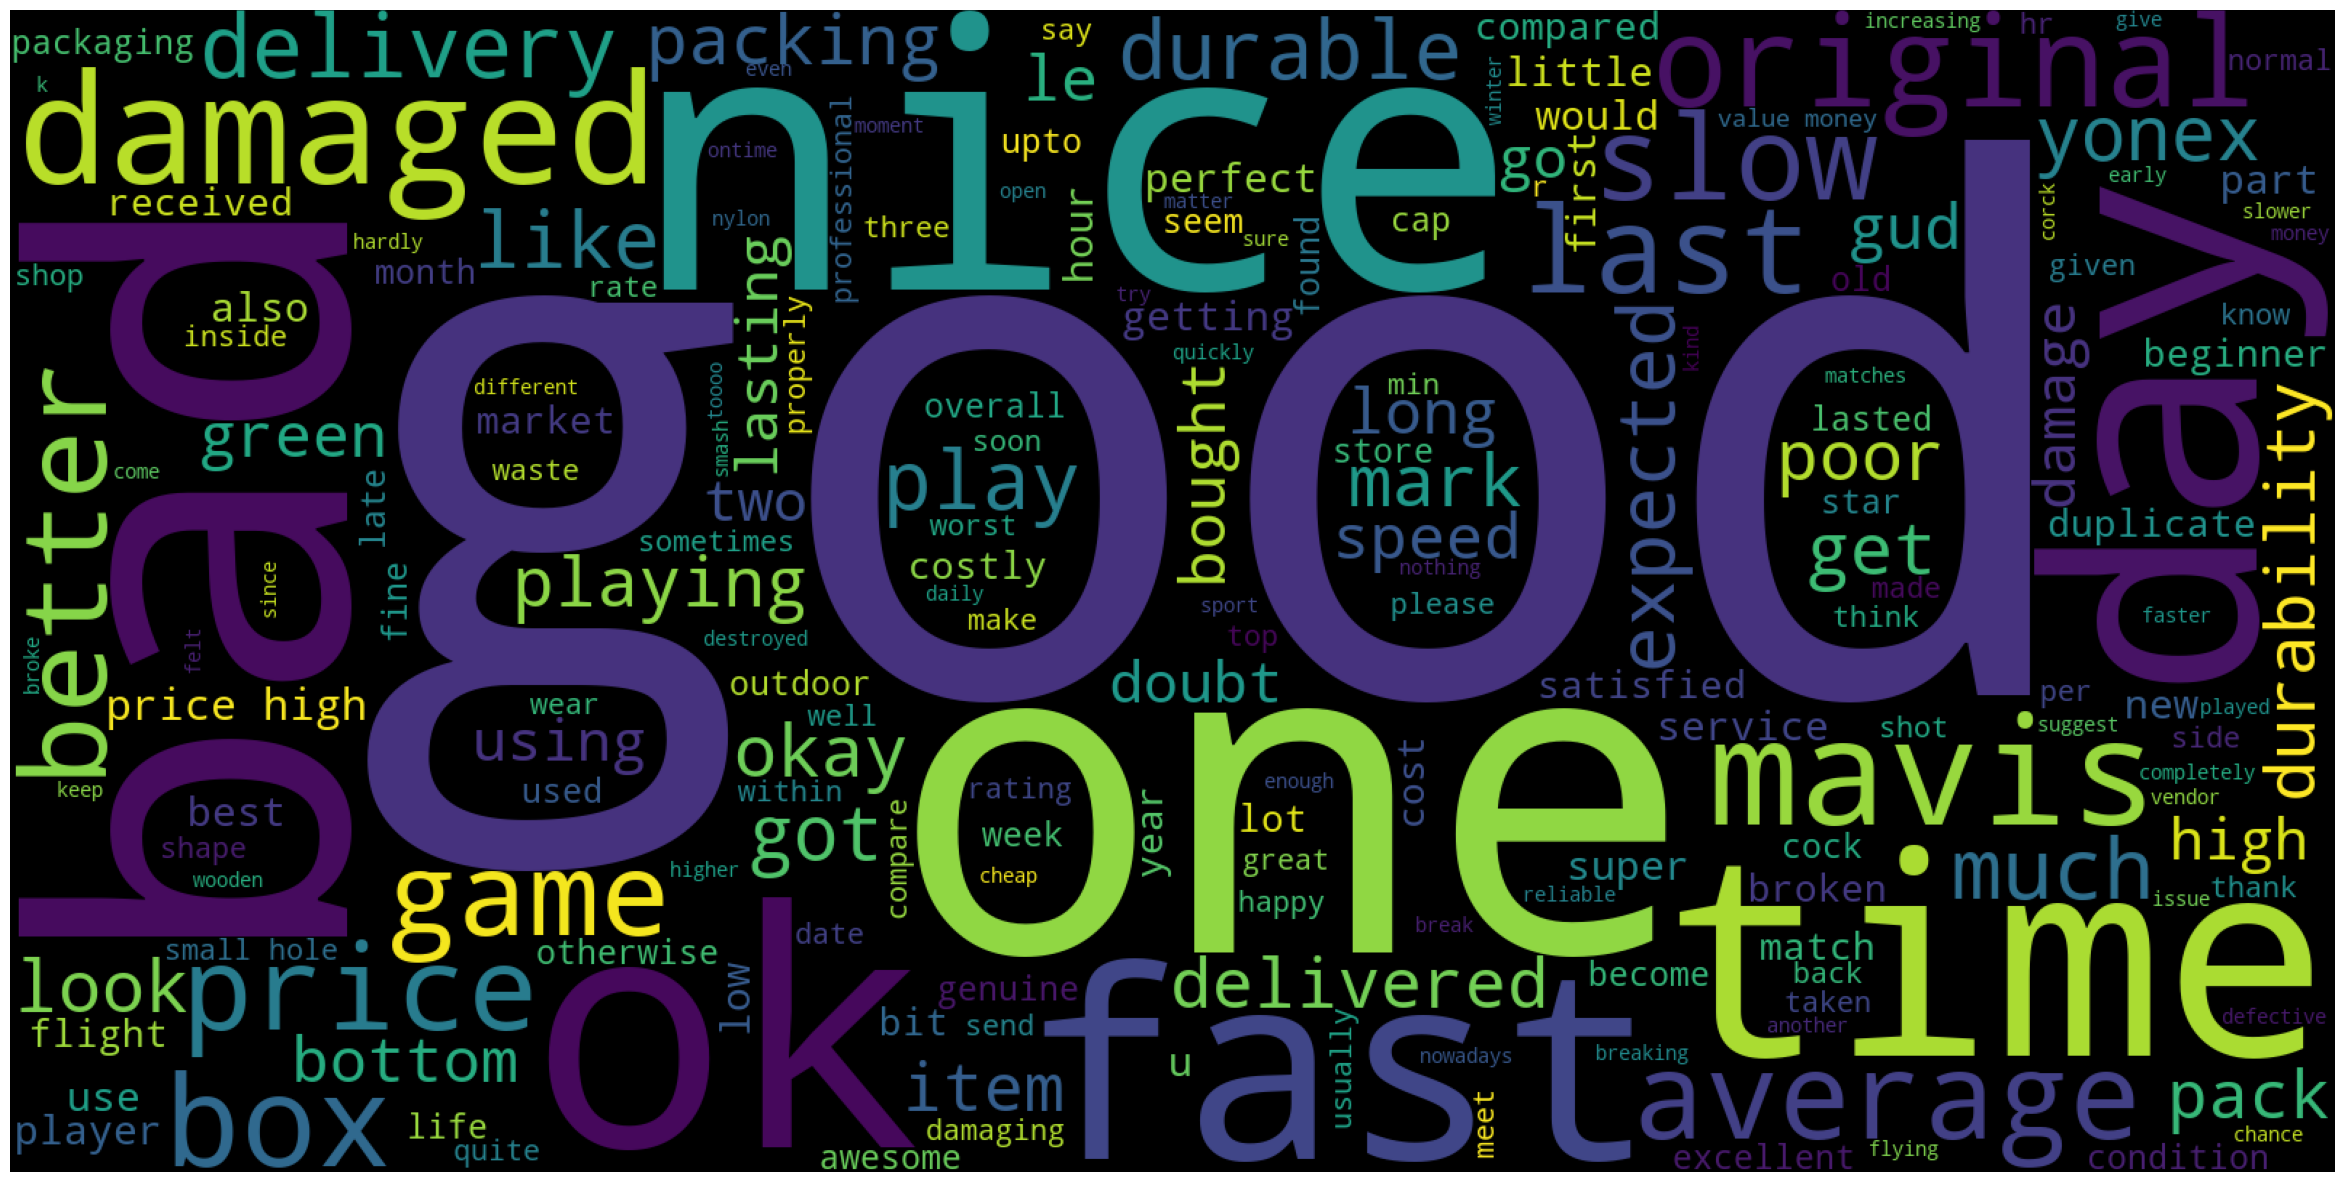

In [21]:
df3=merged_df[merged_df['Ratings']==3]
words_3 = ' '.join(df3['Review'])
wordcloud_3 = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words_3)
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud_3)
plt.axis('off')
plt.show()

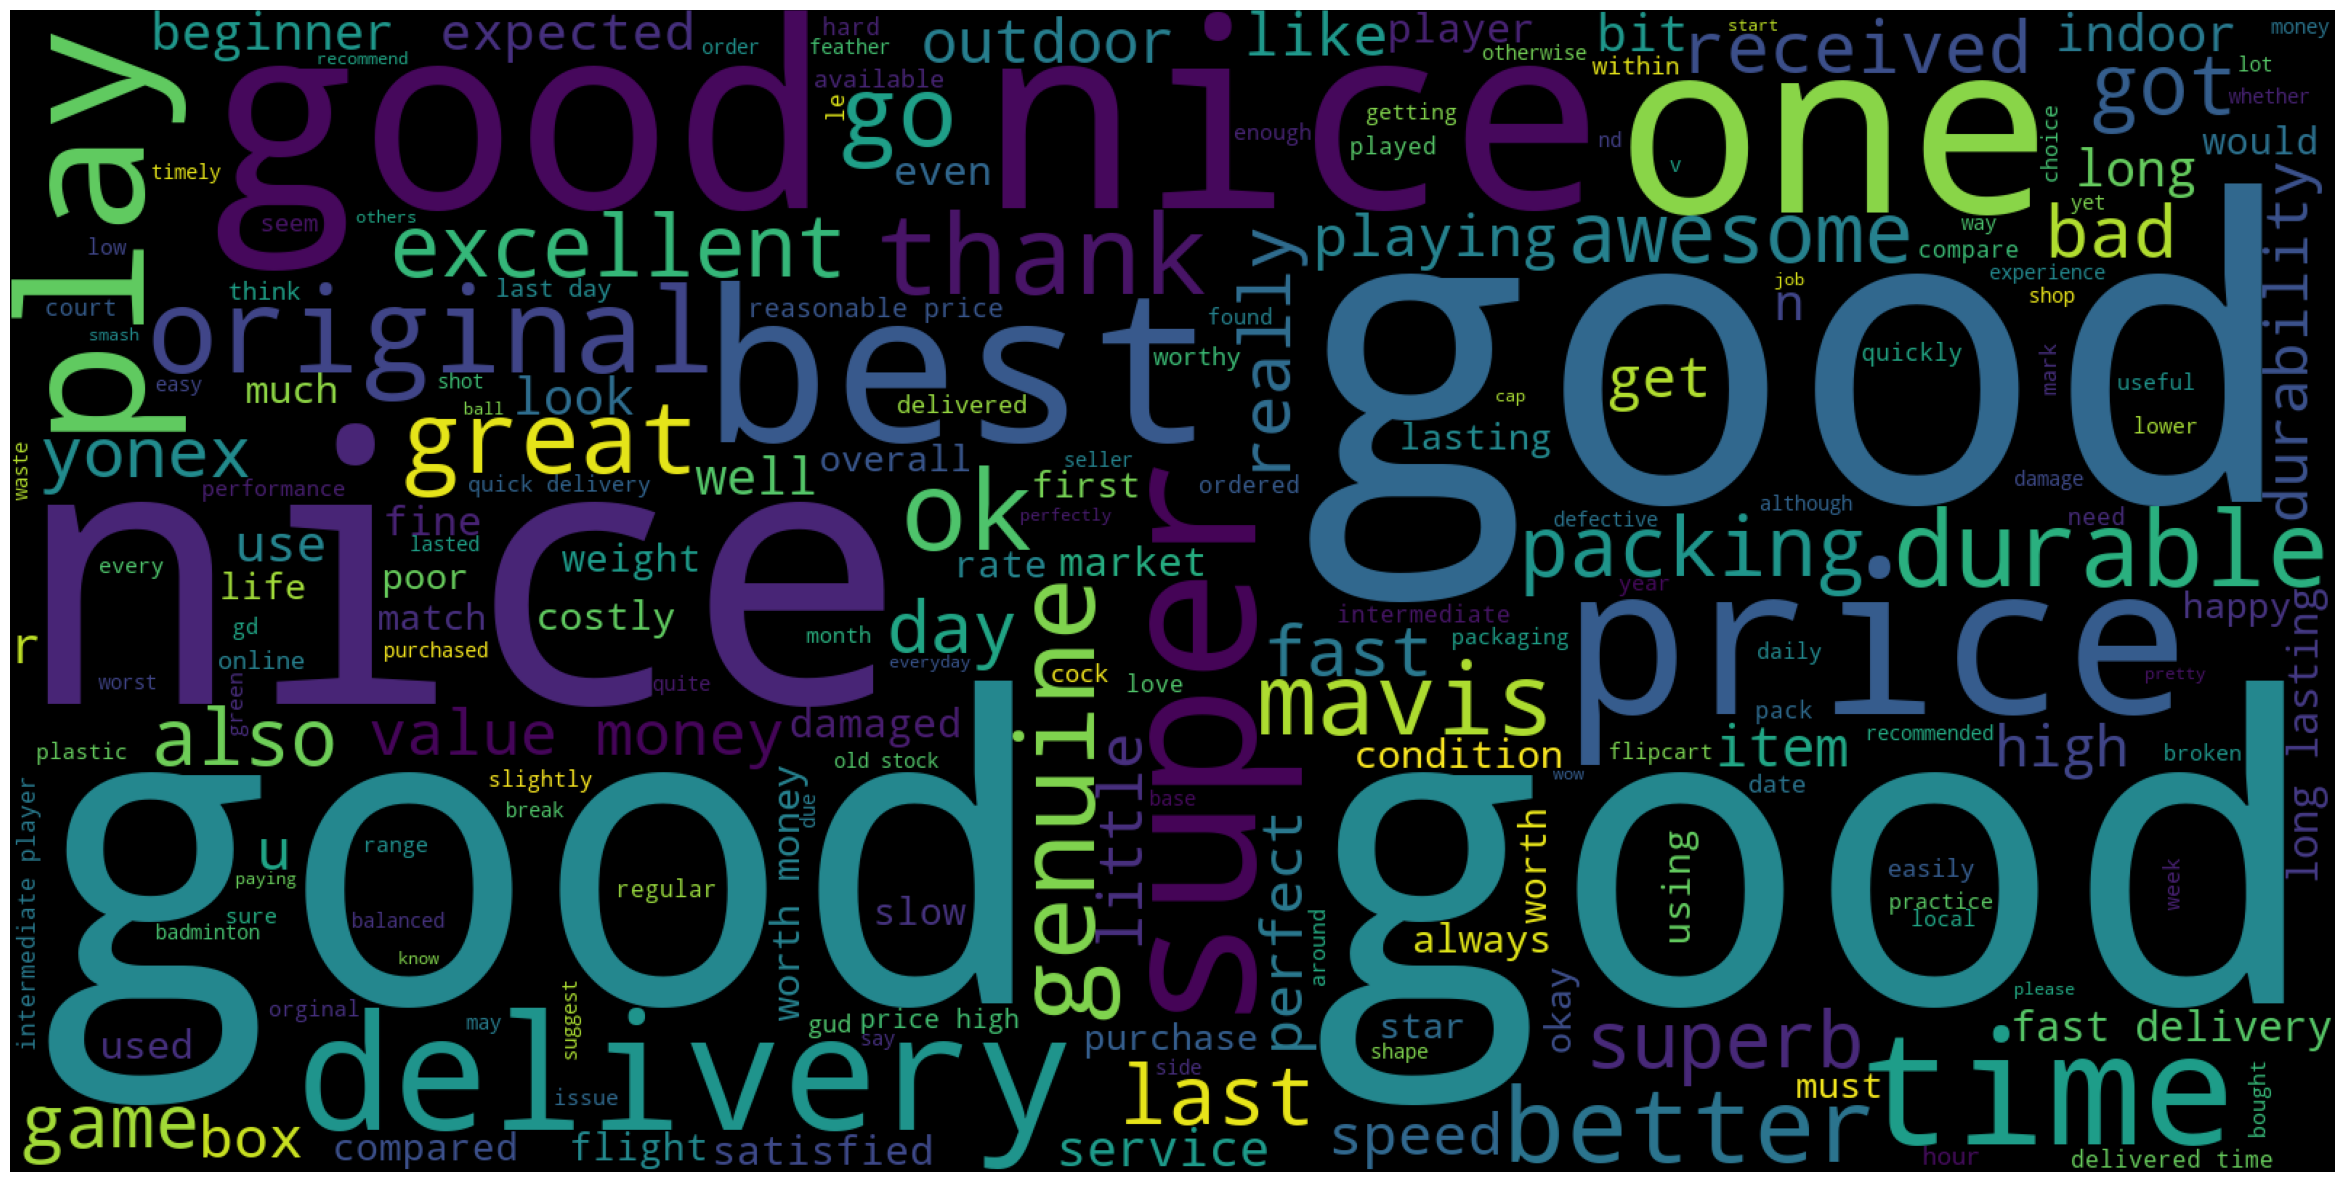

In [22]:
df2=merged_df[merged_df['Ratings']==4]
words_4 = ' '.join(df2['Review'])
wordcloud_4 = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words_4)
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud_4)
plt.axis('off')
plt.show()

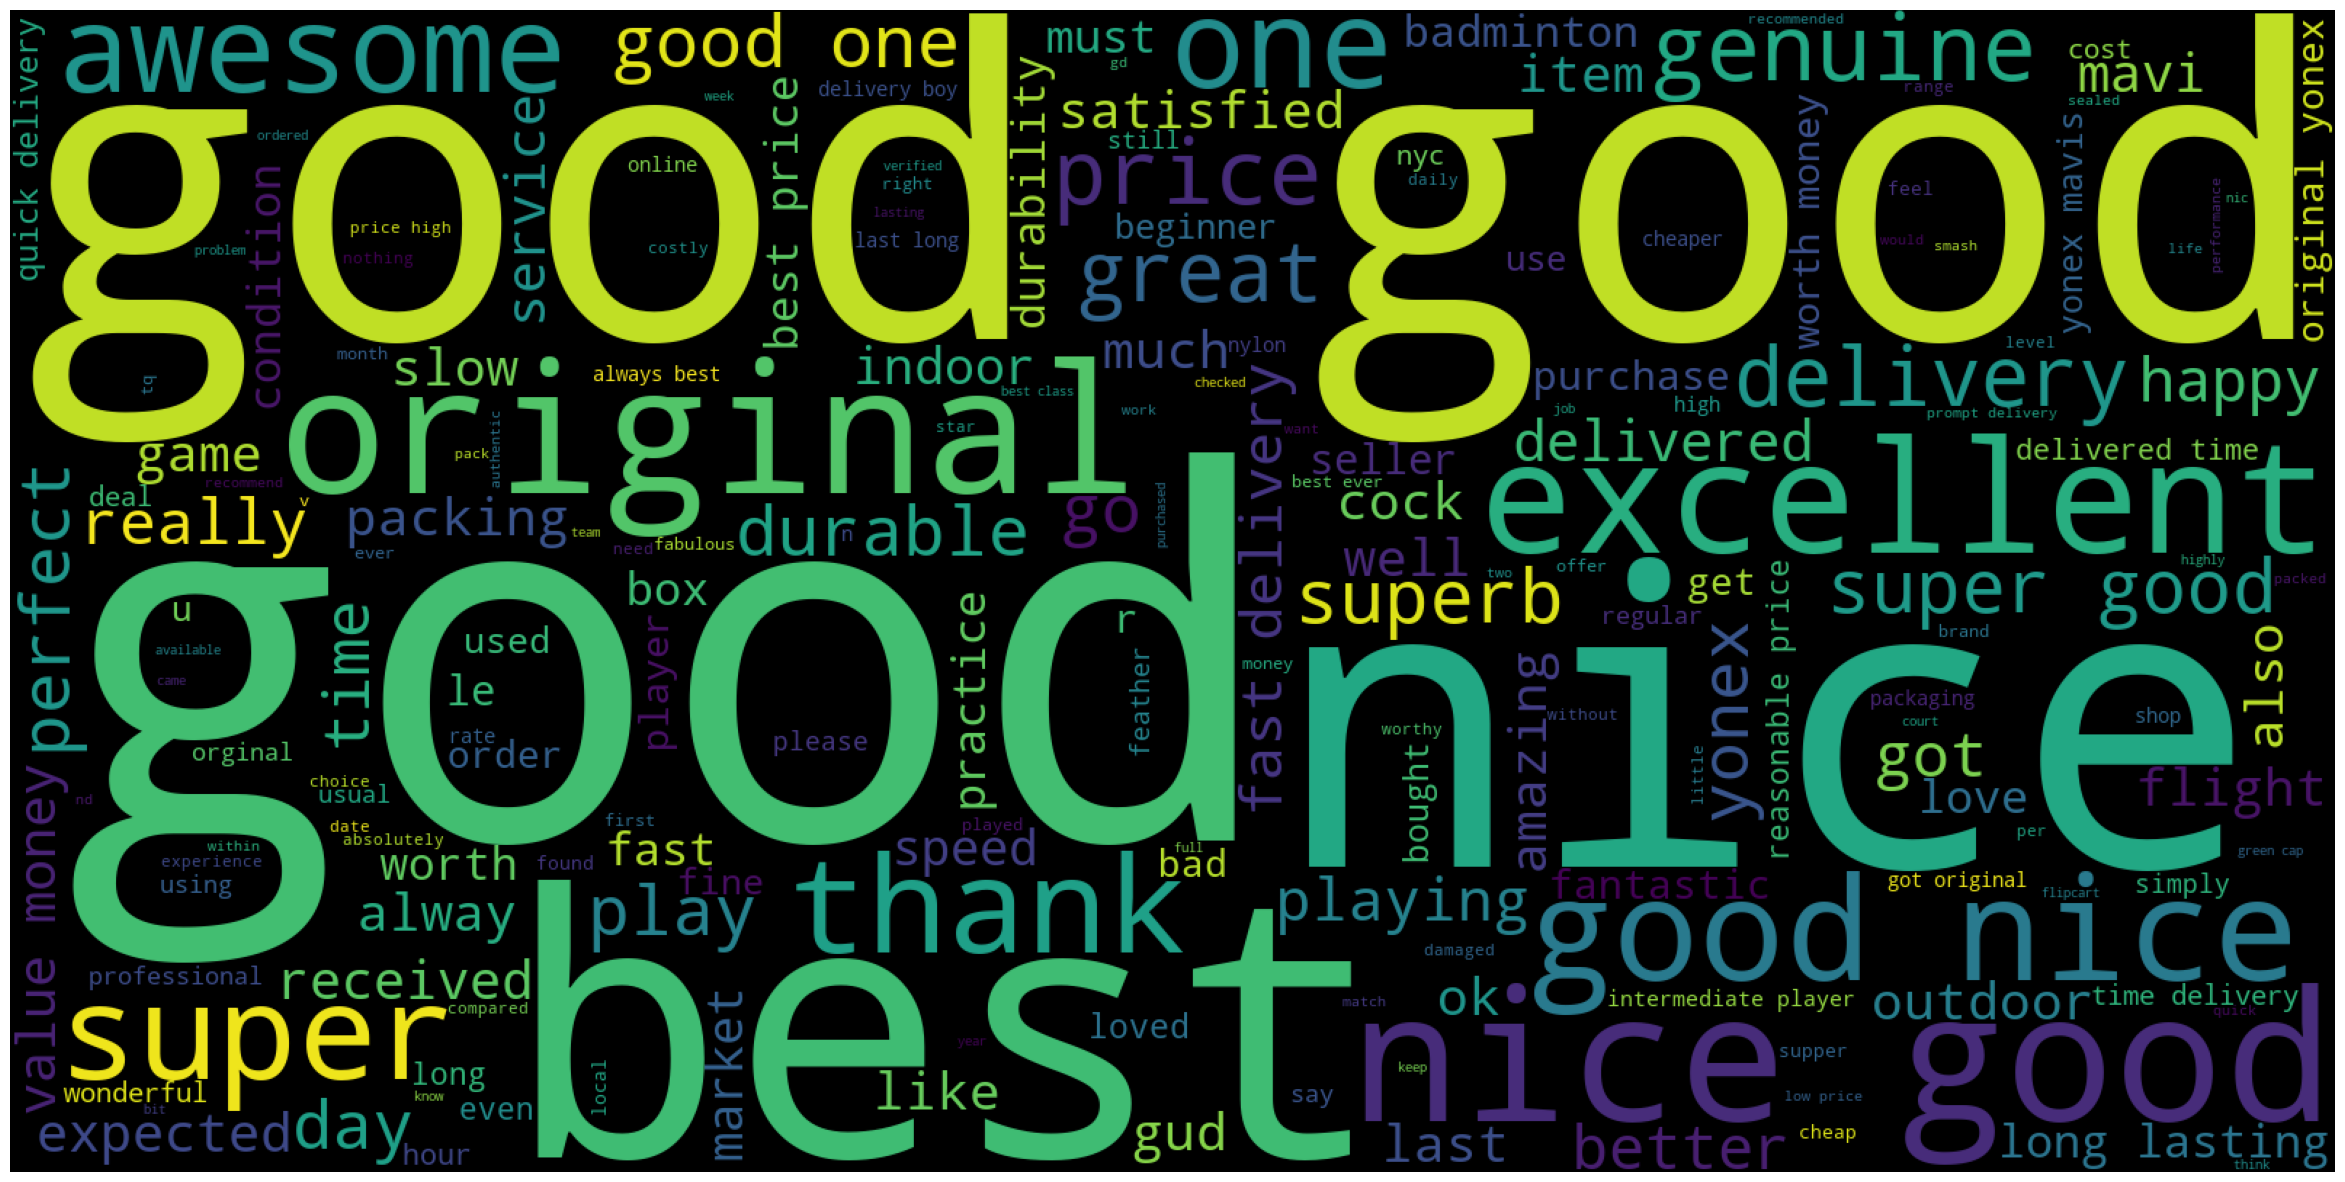

In [23]:
df1=merged_df[merged_df['Ratings']==5]
words_5 = ' '.join(df1['Review'])
wordcloud_5 = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(words_5)
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud_5)
plt.axis('off')
plt.show()

In [24]:
rating_map = {1: "Negative", 2: "Negative", 3: "Neutral", 4: "Positive", 5: "Positive"}
merged_df['sentiment'] = merged_df['Ratings'].map(rating_map)

In [25]:
merged_df.drop(columns="Ratings",inplace=True)

In [26]:
copy_df=merged_df

In [27]:
X=copy_df['Review']
Y=copy_df['sentiment']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

print(X_train.shape, X_test.shape)

(6382,) (2128,)


In [29]:
X_train=X_train.to_frame()
X_test=X_test.to_frame()

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train['Review'])

In [31]:
X_test_bow = vocab.transform(X_test['Review'])

In [33]:
!pip install mlflow

  Obtaining dependency information for mlflow from https://files.pythonhosted.org/packages/be/89/cf804940358c535987dae24bc3c259f2bca7d2601a568e9451757107fbbf/mlflow-2.11.3-py3-none-any.whl.metadata
  Using cached mlflow-2.11.3-py3-none-any.whl.metadata (15 kB)
  Obtaining dependency information for gitpython<4,>=3.1.9 from https://files.pythonhosted.org/packages/67/c7/995360c87dd74e27539ccbfecddfb58e08f140d849fcd7f35d2ed1a5f80f/GitPython-3.1.42-py3-none-any.whl.metadata
  Using cached GitPython-3.1.42-py3-none-any.whl.metadata (12 kB)
  Obtaining dependency information for sqlparse<1,>=0.4.0 from https://files.pythonhosted.org/packages/98/5a/66d7c9305baa9f11857f247d4ba761402cea75db6058ff850ed7128957b7/sqlparse-0.4.4-py3-none-any.whl.metadata
  Using cached sqlparse-0.4.4-py3-none-any.whl.metadata (4.0 kB)
  Obtaining dependency information for alembic!=1.10.0,<2 from https://files.pythonhosted.org/packages/7f/50/9fb3a5c80df6eb6516693270621676980acd6d5a9a7efdbfa273f8d616c7/alembic-1.13.

In [34]:
import mlflow
mlflow.set_experiment("sentiment_analysis")

2024/03/29 00:33:57 INFO mlflow.tracking.fluent: Experiment with name 'sentiment_analysis' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/Harsh/AI-ML/Innomatics/MLOps/mlruns/360868635066327212', creation_time=1711652637832, experiment_id='360868635066327212', last_update_time=1711652637832, lifecycle_stage='active', name='sentiment_analysis', tags={}>

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define pipelines
pipelines = {
    'knn' : Pipeline([
        ('classifier', KNeighborsClassifier())
    ]), 
    'svc' : Pipeline([
        ('classifier', SVC())
    ]),
    'logistic_regression': Pipeline([
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('classifier', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        ('classifier', DecisionTreeClassifier())
    ]),
    'naive_bayes_multinomial': Pipeline([
        ('classifier', MultinomialNB())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'knn': [
        {
            'classifier__n_neighbors' : [i for i in range(3, 21, 2)], 
            'classifier__p' : [1, 2, 3],
            'classifier__metric': ['cosine', 'euclidean']
        }
    ],
    'svc': [
        {
            'classifier__kernel' : ['rbf'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'classifier__kernel' : ['poly'], 
            'classifier__degree' : [2, 3, 4, 5], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'classifier__kernel' : ['linear'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }
    ],
    'logistic_regression': [
        {
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l2']
        }, 
        {
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l1'], 
            'classifier__solver': ['liblinear']
        }, 
        {
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'random_forest': [
        {
            'classifier__n_estimators': [50, 100, 200]
        }
    ],
    'decision_tree': [
        {
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'naive_bayes_multinomial': [
        {
            'classifier__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    mlflow.sklearn.autolog(max_tuning_runs=None)
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train_bow, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test_bow, y_test))
    
    best_models[algo] = grid_search.best_estimator_
    print()

********** knn **********


2024/03/29 00:36:06 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'toarray'


Fitting 5 folds for each of 54 candidates, totalling 270 fits


2024/03/29 00:42:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Harsh\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils."


CPU times: total: 5min 33s
Wall time: 6min 21s
Train Score:  0.8577240691962696
Test Score:  0.8491541353383458

********** svc **********


2024/03/29 00:42:28 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'toarray'


Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: total: 3min 55s
Wall time: 4min 28s
Train Score:  0.8594485753492587
Test Score:  0.8529135338345865

********** logistic_regression **********


2024/03/29 00:46:57 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'toarray'


Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

CPU times: total: 3min 1s
Wall time: 3min 34s
Train Score:  0.8643056684087658
Test Score:  0.8547932330827067

********** random_forest **********


2024/03/29 00:50:31 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'toarray'


Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 3min 52s
Wall time: 4min 22s
Train Score:  0.8574109577943995
Test Score:  0.855733082706767

********** decision_tree **********


2024/03/29 00:54:55 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'toarray'


Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 4.78 s
Wall time: 11.8 s
Train Score:  0.8528662396928537
Test Score:  0.8449248120300752

********** naive_bayes_multinomial **********


2024/03/29 00:55:07 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'toarray'


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


CPU times: total: 1.27 s
Wall time: 8.4 s
Train Score:  0.8627382702896433
Test Score:  0.855733082706767



In [36]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

knn
Pipeline(steps=[('classifier',
                 KNeighborsClassifier(metric='cosine', n_neighbors=19, p=1))])

svc
Pipeline(steps=[('classifier', SVC(C=1, kernel='linear'))])

logistic_regression
Pipeline(steps=[('classifier', LogisticRegression(C=1))])

random_forest
Pipeline(steps=[('classifier', RandomForestClassifier())])

decision_tree
Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=10))])

naive_bayes_multinomial
Pipeline(steps=[('classifier', MultinomialNB(alpha=1.5))])



In [38]:
import joblib
import os
from sklearn import metrics  

if not os.path.exists('best_models'):
    os.makedirs('best_models')

for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    # Save the model
    joblib.dump(model, f'best_models/{name}.pkl')
    
    # Load the model
    model = joblib.load(f'best_models/{name}.pkl')
    
    # Predict and evaluate the model
    %time y_test_pred = model.predict(X_test_bow)
    print("Accuracy Score:", metrics.accuracy_score(y_test, y_test_pred))
    
    # Display the model size
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")


********** knn **********
CPU times: total: 531 ms
Wall time: 551 ms
Accuracy Score: 0.8491541353383458
Model Size: 284522 Bytes
********** svc **********
CPU times: total: 203 ms
Wall time: 203 ms
Accuracy Score: 0.8529135338345865
Model Size: 167865 Bytes
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 1.03 ms
Accuracy Score: 0.8547932330827067
Model Size: 53237 Bytes
********** random_forest **********
CPU times: total: 125 ms
Wall time: 164 ms
Accuracy Score: 0.855733082706767
Model Size: 22506791 Bytes
********** decision_tree **********
CPU times: total: 0 ns
Wall time: 0 ns
Accuracy Score: 0.8449248120300752
Model Size: 13663 Bytes
********** naive_bayes_multinomial **********
CPU times: total: 0 ns
Wall time: 1 ms
Accuracy Score: 0.855733082706767
Model Size: 105117 Bytes


In [43]:
copy_df

Review sentiment
0     nice  good  price rising bad sign affordable p...  Positive
1     supplied yonex mavis outside cover yonex ad in...  Negative
2     worst  damaged cock packed new box original yo...  Negative
3     quite k nowadays   like year back using mavis ...   Neutral
4     pricedjust retailer understand wat advantage i...  Negative
...                                                 ...       ...
8505                   delivered time price high market   Neutral
8506                    mark available market le price   Positive
8507                                nice delivery speed  Positive
8508  complaint item best one way priced easily avai...  Positive
8509  sure charged  mrp okay pay r  compared mrp rd ...  Negative

[8510 rows x 2 columns]

In [44]:
file_path = "output.csv"
copy_df.to_csv(file_path, index=False)